In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error

from pathlib import Path

from xgb_model_info import features, target

Import the training set:

In [2]:
cwd = Path.cwd()

filepath = cwd / 'data/model-training-set.csv'
data = pd.read_csv(filepath, index_col=None)

In [3]:
X = data[features]
y = data[target]

In [4]:
param_grid = {
                "max_depth": [3, 5, 7],
                "learning_rate": [0.1, 0.01],
                "n_estimators": [300, 400, 500, 750, 1000],
                "reg_alpha": [0, 0.1, 1],
                "reg_lambda": [1, 5, 10],
            }

In [5]:
xgb_grid = GridSearchCV(XGBRegressor(),
             param_grid=param_grid,
             scoring='neg_root_mean_squared_error',
             return_train_score=True)

In [ ]:
#This took over 12 minutes with the above parameter grid, on a 10th gen Intel Macbook pro
xgb_grid.fit(X, y)

In [7]:
xgb_grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 1000,
 'reg_alpha': 1,
 'reg_lambda': 10}

In [8]:
xgb_grid.best_score_

np.float64(-435.71666259765624)

In [ ]:
best_params = {'learning_rate': 0.1,
                'max_depth': 5,
                'n_estimators': 1000,
                'reg_alpha': 0.1,
                'reg_lambda': 10 #Formerly 5. This changed after adding a single row to the data, 
                                #which may have changed the train-test-split
                }

In [20]:
xgb_grid.best_estimator_.fit(X, y)

preds = xgb_grid.best_estimator_.predict(X)

print("Training RMSE on full training set:", root_mean_squared_error(y, preds))
print("Training MAPE on full training set:", mean_absolute_percentage_error(y, preds))

Training RMSE on full training set: 202.7365264892578
Training MAPE on full training set: 0.012066550552845001


### Check feature importance scores:

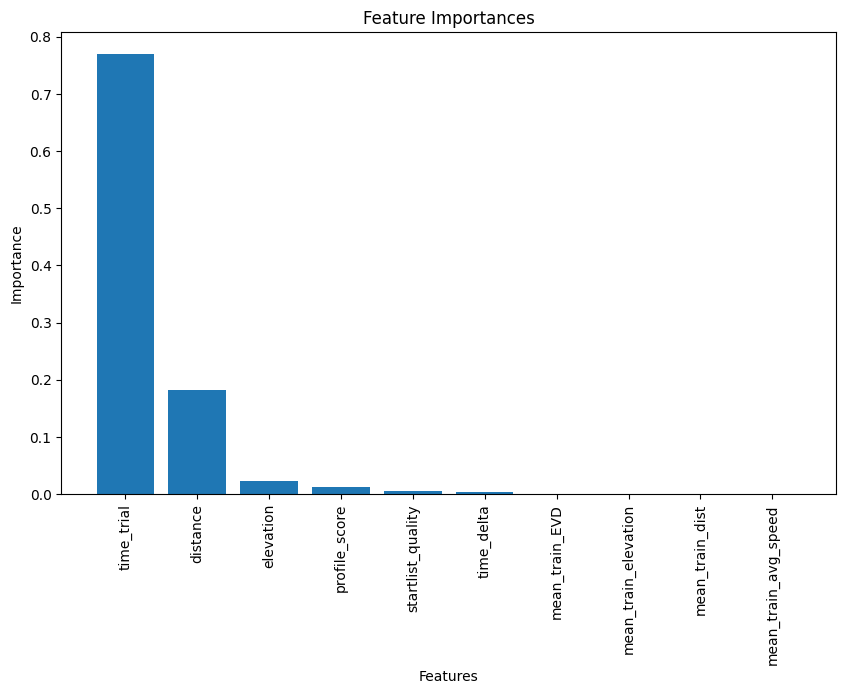

In [22]:
import matplotlib.pyplot as plt

importances = xgb_grid.best_estimator_.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [features[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [9]:
X_tt, X_val, y_tt, y_val = train_test_split(X, y,
                                            train_size=0.8,
                                            shuffle=True,
                                            random_state=42)

In [10]:
params5 = {'learning_rate': 0.1,
                'max_depth': 5,
                'n_estimators': 1000,
                'reg_alpha': 0.1,
                'reg_lambda': 5,
                }

xgb5 = XGBRegressor(**params5)

xgb5.fit(X_tt, y_tt)

train_preds = xgb5.predict(X_tt)
val_preds = xgb5.predict(X_val)

print("Train RMSE:", root_mean_squared_error(y_tt, train_preds))
print("Validation RMSE:", root_mean_squared_error(y_val, val_preds))

Train RMSE: 158.34817504882812
Validation RMSE: 460.154052734375


In [ ]:
params10 = {'learning_rate': 0.1,
                'max_depth': 5,
                'n_estimators': 1000,
                'reg_alpha': 0.1,
                'reg_lambda': 10
                }

xgb10 = XGBRegressor(**params)

xgb10.fit(X_tt, y_tt)

train_preds = xgb10.predict(X_tt)
val_preds = xgb10.predict(X_val)

print("Train RMSE:", root_mean_squared_error(y_tt, train_preds))
print("Validation RMSE:", root_mean_squared_error(y_val, val_preds))

Train RMSE: 158.34817504882812
Validation RMSE: 460.154052734375
